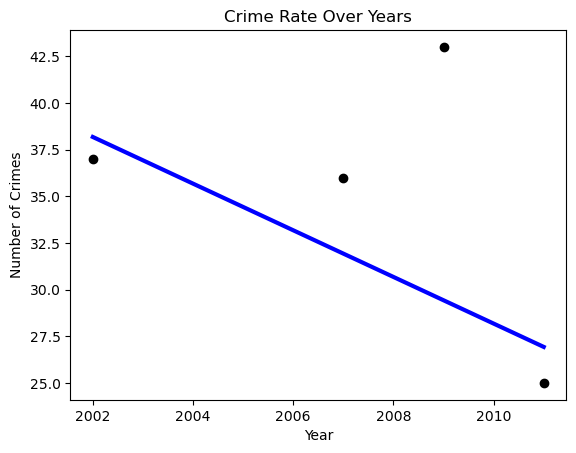

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\49174\\Downloads\\ChicagoCrimeData.csv')

# Preprocesamiento básico
# Convertir la columna de fecha y extraer el año
df['Year'] = pd.to_datetime(df['DATE']).dt.year

# Agregar datos
yearly_crimes = df.groupby('Year').size()

# Preparar datos para el modelo de regresión
X = yearly_crimes.index.values.reshape(-1, 1)
y = yearly_crimes.values

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predictions = model.predict(X_test)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Rate Over Years')
plt.show()


In [6]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('C:\\Users\\49174\\Downloads\\ChicagoCrimeData.csv')

# Asegúrate de que tus datos están en el formato correcto
print(df.head())

         ID CASE_NUMBER        DATE                     BLOCK IUCR  \
0   3512276    HK587712  2004-08-28        047XX S KEDZIE AVE  890   
1   3406613    HK456306  2004-06-26  009XX N CENTRAL PARK AVE  820   
2   8002131    HT233595  2011-04-04        043XX S WABASH AVE  820   
3   7903289    HT133522  2010-12-30      083XX S KINGSTON AVE  840   
4  10402076    HZ138551  2016-02-02           033XX W 66TH ST  820   

  PRIMARY_TYPE                    DESCRIPTION          LOCATION_DESCRIPTION  \
0        THEFT                  FROM BUILDING            SMALL RETAIL STORE   
1        THEFT                 $500 AND UNDER                         OTHER   
2        THEFT                 $500 AND UNDER  NURSING HOME/RETIREMENT HOME   
3        THEFT  FINANCIAL ID THEFT: OVER $300                     RESIDENCE   
4        THEFT                 $500 AND UNDER                         ALLEY   

   ARREST  DOMESTIC  ...  DISTRICT  WARD  COMMUNITY_AREA_NUMBER  FBICODE  \
0   False     False  ...    

In [7]:
df['ARREST'] = df['ARREST'].astype(int)


# Calculate total crimes and number of arrests per location
crime_location_summary = df.groupby('LOCATION_DESCRIPTION').agg(
    TotalCrimes=('ARREST', 'count'),
    ArrestsMade=('ARREST', 'sum')
).reset_index()

# Calculate the arrest rate
crime_location_summary['ArrestRate'] = crime_location_summary['ArrestsMade'] / crime_location_summary['TotalCrimes']

# Show the first rows to verify
print(crime_location_summary.head())




  LOCATION_DESCRIPTION  TotalCrimes  ArrestsMade  ArrestRate
0     AIRPORT/AIRCRAFT            3            2    0.666667
1                ALLEY           11            5    0.454545
2            APARTMENT           59           12    0.203390
3        ATHLETIC CLUB            1            0    0.000000
4                 BANK            5            1    0.200000


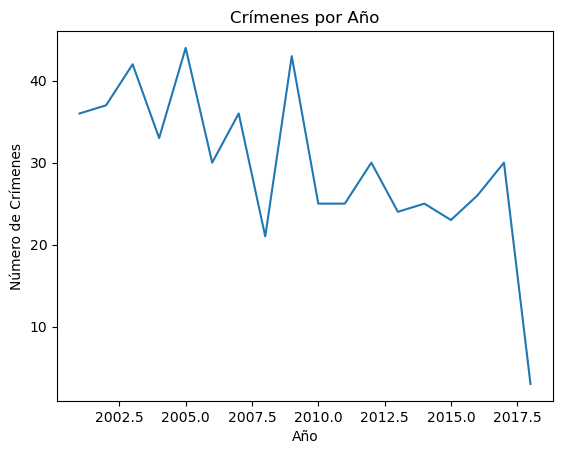

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('C:\\Users\\49174\\Downloads\\ChicagoCrimeData.csv')

# Convertir la columna de fecha
df['DATE'] = pd.to_datetime(df['DATE'])

# Extraer año y mes para análisis de tendencia
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

# Contar crímenes por año
crimes_per_year = df.groupby('YEAR').size()

# Visualizar
crimes_per_year.plot(kind='line', title='Crímenes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Crímenes')
plt.show()

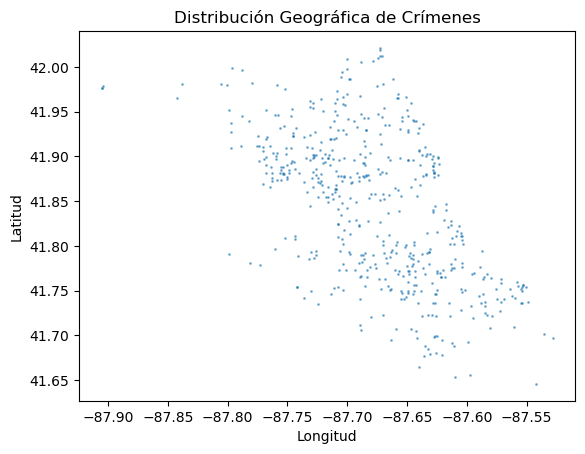

In [9]:
# Asumiendo que df tiene columnas 'LATITUDE' y 'LONGITUDE'
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5, s=1)
plt.title('Distribución Geográfica de Crímenes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


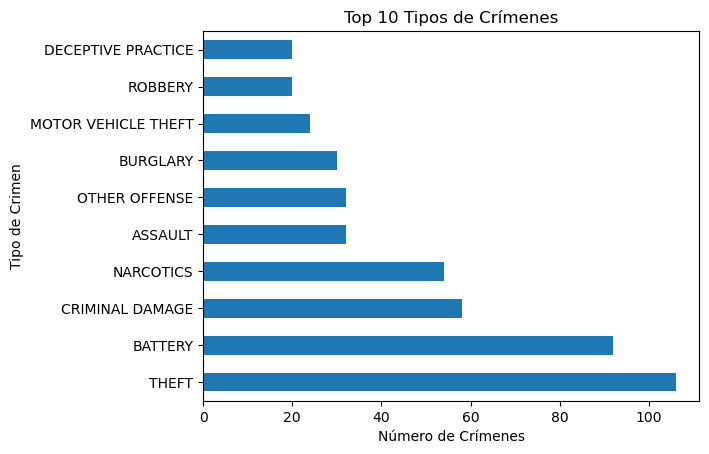

In [10]:
# Contar crímenes por tipo
crimes_by_type = df.groupby('PRIMARY_TYPE').size().sort_values(ascending=False)

# Visualizar los 10 tipos de crímenes más comunes
crimes_by_type.head(10).plot(kind='barh', title='Top 10 Tipos de Crímenes')
plt.xlabel('Número de Crímenes')
plt.ylabel('Tipo de Crimen')
plt.show()


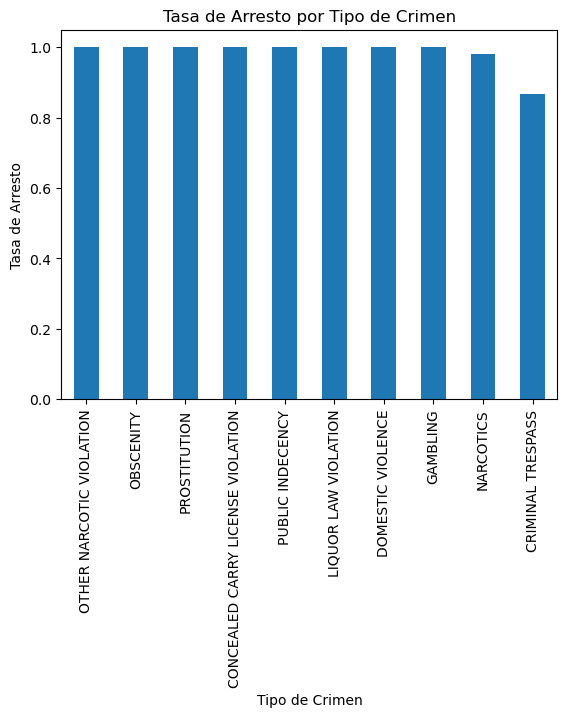

In [11]:
# Calcular tasa de arresto
arrest_rate = df.groupby('PRIMARY_TYPE')['ARREST'].mean().sort_values(ascending=False)

# Visualizar las tasas de arresto para los 10 tipos de crímenes más comunes
arrest_rate.head(10).plot(kind='bar', title='Tasa de Arresto por Tipo de Crimen')
plt.ylabel('Tasa de Arresto')
plt.xlabel('Tipo de Crimen')
plt.show()


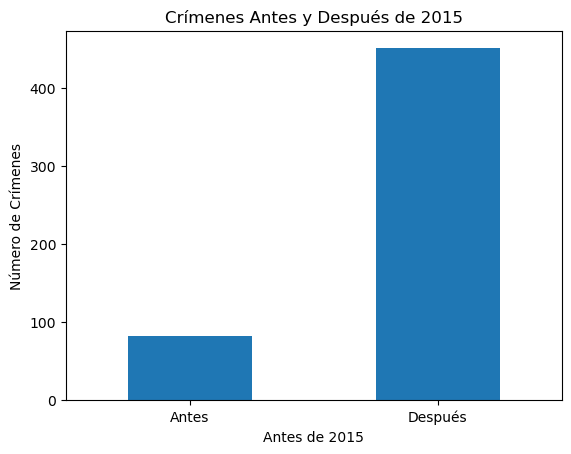

In [12]:
df['BEFORE_2015'] = df['YEAR'] < 2015
crimes_before_after = df.groupby('BEFORE_2015').size()

# Visualizar
crimes_before_after.plot(kind='bar', title='Crímenes Antes y Después de 2015')
plt.xlabel('Antes de 2015')
plt.ylabel('Número de Crímenes')
plt.xticks([0, 1], ['Antes', 'Después'], rotation=0)
plt.show()

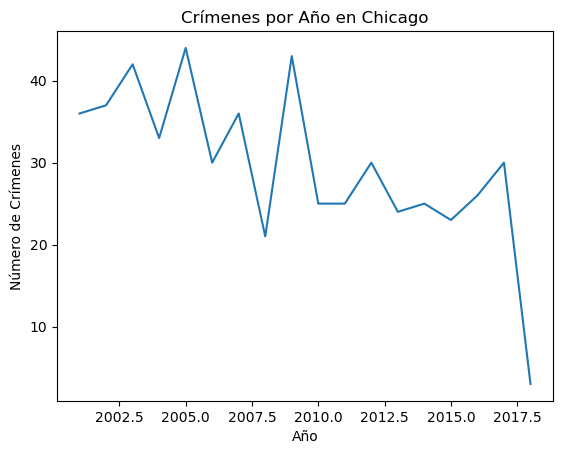

In [13]:
# Agrupar por año y contar crímenes
crimes_per_year = df.groupby(df['DATE'].dt.year).size()

# Visualizar
crimes_per_year.plot(kind='line', title='Crímenes por Año en Chicago')
plt.xlabel('Año')
plt.ylabel('Número de Crímenes')
plt.show()

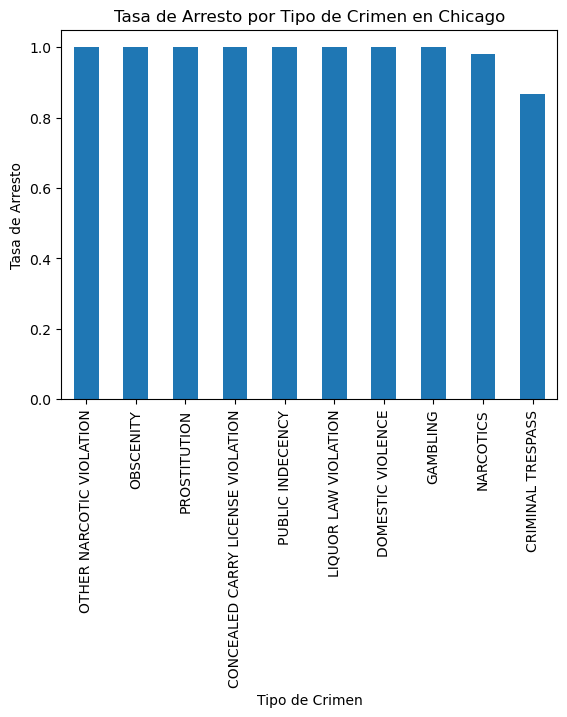

In [14]:
# Calcular la tasa de arresto por tipo de crimen
arrest_rate = df.groupby('PRIMARY_TYPE')['ARREST'].mean().sort_values(ascending=False)

# Visualizar las tasas de arresto para los 10 tipos de crímenes más comunes
arrest_rate.head(10).plot(kind='bar', title='Tasa de Arresto por Tipo de Crimen en Chicago')
plt.ylabel('Tasa de Arresto')
plt.xlabel('Tipo de Crimen')
plt.show()



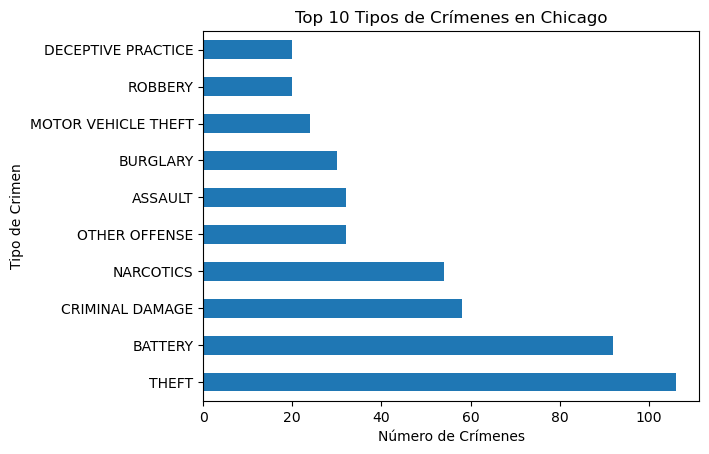

In [15]:
# Contar crímenes por tipo y visualizar los 10 más comunes
df['PRIMARY_TYPE'].value_counts().head(10).plot(kind='barh', title='Top 10 Tipos de Crímenes en Chicago')
plt.xlabel('Número de Crímenes')
plt.ylabel('Tipo de Crimen')
plt.show()


In [16]:
!pip install seaborn scipy

C:\Users\49174\AppData\Local\Temp\ipykernel_29192\754446807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="coolwarm")


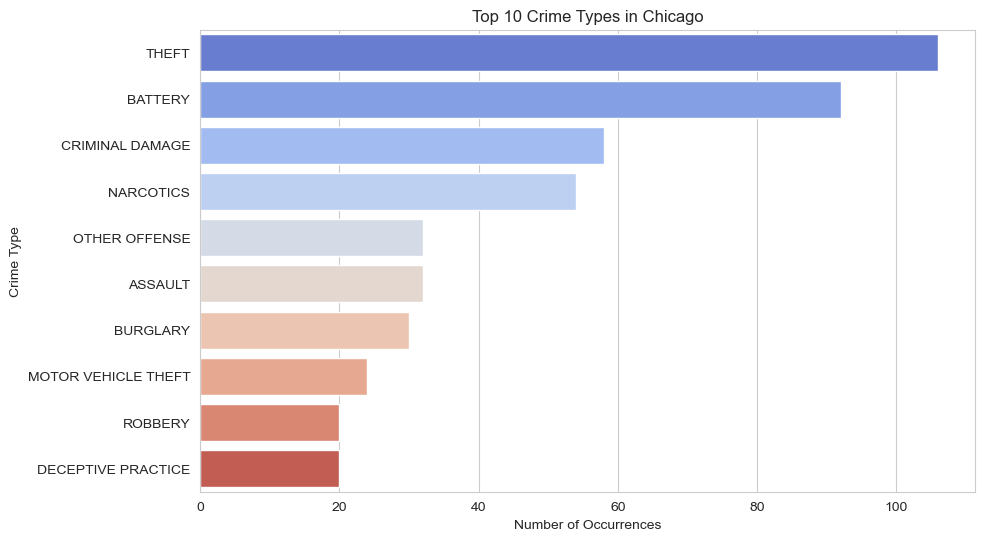

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Count the occurrences of each crime type and select the top 10
top_crimes = df['PRIMARY_TYPE'].value_counts().head(10)

# Create a bar plot for the top 10 crime types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="coolwarm")
plt.title('Top 10 Crime Types in Chicago')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.show()

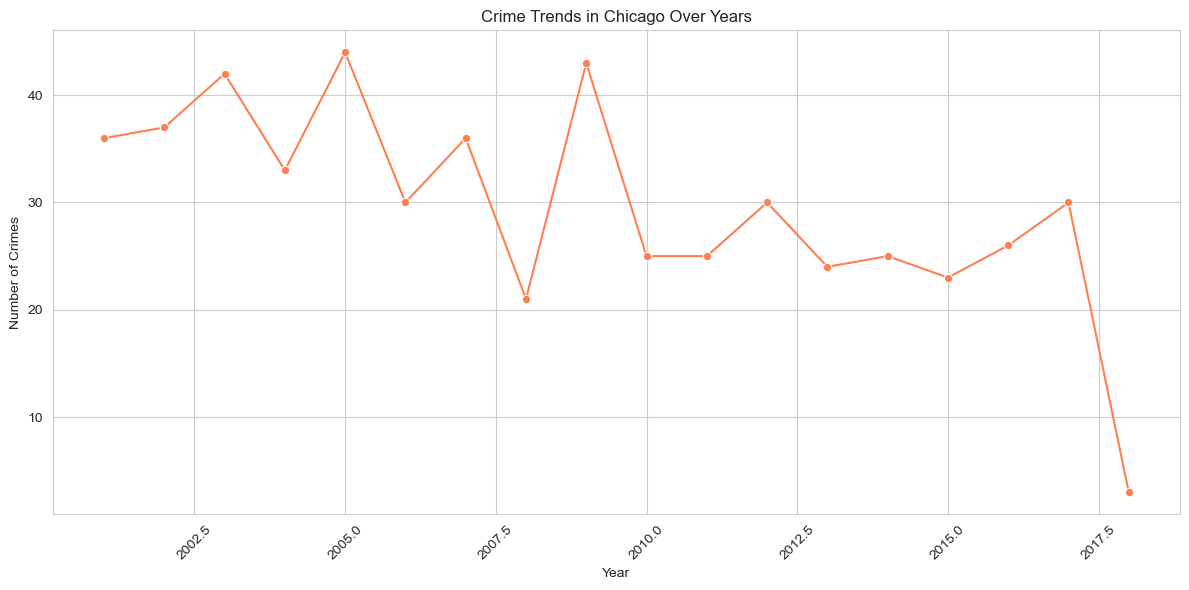

In [18]:
# Extract the year from the DATE column
df['YEAR'] = df['DATE'].dt.year

# Count the number of crimes for each year
crimes_per_year = df.groupby('YEAR').size().reset_index(name='Counts')

# Plotting the trend of crimes over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crimes_per_year, x='YEAR', y='Counts', marker='o', color='coral')
plt.title('Crime Trends in Chicago Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


In [19]:
df['ARREST_MADE'] = df['ARREST'].apply(lambda x: 1 if x else 0)

In [20]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the top crime type
top_crime_type = df['PRIMARY_TYPE'].value_counts().idxmax()
top_crime_df = df[df['PRIMARY_TYPE'] == top_crime_type]

# Split the data into two groups: Arrests made and Arrests not made
arrests_made = top_crime_df[top_crime_df['ARREST'] == True]['ARREST_MADE']
arrests_not_made = top_crime_df[top_crime_df['ARREST'] == False]['ARREST_MADE']

# Perform a t-test between the two groups
t_stat, p_val = ttest_ind(arrests_made, arrests_not_made)

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: inf, P-value: 0.0


C:\Users\49174\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\49174\AppData\Local\Temp\ipykernel_29192\1898683665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_crime_df['ARREST_TEXT'] = top_crime_df['ARREST'].apply(lambda x: 'Arrest Made' if x else 'No Arrest')


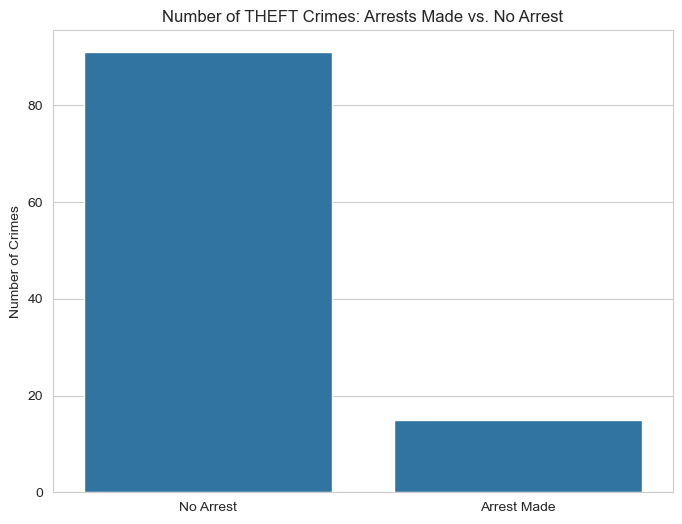

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for easier plotting
top_crime_df['ARREST_TEXT'] = top_crime_df['ARREST'].apply(lambda x: 'Arrest Made' if x else 'No Arrest')

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=top_crime_df, x='ARREST_TEXT')
plt.title(f"Number of {top_crime_type} Crimes: Arrests Made vs. No Arrest")
plt.xlabel('')
plt.ylabel('Number of Crimes')
plt.show()


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegúrate de que el índice del DataFrame sea de tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Resamplea los datos para obtener conteos mensuales
monthly_crimes = df.resample('M').size()

# Descomposición
result = seasonal_decompose(monthly_crimes, model='additive')
result.plot()
plt.show()

C:\Users\49174\AppData\Local\Temp\ipykernel_29192\1186743042.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = df.resample('M').size()


ValueError: freq ME not understood. Please report if you think this is in error.

In [ ]:
!pip install folium
import folium
from folium.plugins import HeatMapWithTime

# Crear una lista de datos para cada mes/año
# Asumiendo que 'LATITUDE' y 'LONGITUDE' están limpias
data = df.groupby([df.index.year, df.index.month]).apply(lambda x: x[['LATITUDE', 'LONGITUDE']].values.tolist())

# Crear el mapa de calor dinámico
mapa = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMapWithTime(data, radius=5).add_to(mapa)

mapa

In [ ]:
import networkx as nx

# Crear un grafo
G = nx.Graph()

# Añadir nodos y aristas basados en tu análisis específico
# Esto es solo un esquema
G.add_node("Robo")
G.add_node("Asalto")
G.add_edge("Robo", "Asalto", weight=5)

# Dibujar el grafo
nx.draw(G, with_labels=True)

In [ ]:
# Assuming 'df' is your DataFrame and it includes a 'DATE' column
df['DATE'] = pd.to_datetime(df['DATE'])
df['HOUR'] = df['DATE'].dt.hour


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparar los datos (este paso depende de tu conjunto de datos específico)
X = df[['LATITUDE', 'LONGITUDE', 'HOUR']]  # Ejemplo de características
y = df['PRIMARY_TYPE']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluar el modelo
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
# Initialize and train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))


In [ ]:
# Aggregate crime counts by district
crime_counts_by_district = df['DISTRICT'].value_counts().reset_index()
crime_counts_by_district.columns = ['DISTRICT', 'CRIME_COUNTS']

# Select the top 5 districts with the most crimes
top_5_districts = crime_counts_by_district.head(5)

print(top_5_districts)


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for the top 5 districts with the most crimes
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRICT', y='CRIME_COUNTS', data=top_5_districts, palette='coolwarm', order=top_5_districts['DISTRICT'])

plt.title('Top 5 Districts with Most Crimes')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Rotate district labels for better readability

plt.show()


NameError: name 'top_5_districts' is not defined

<Figure size 1000x600 with 0 Axes>

In [24]:
# Filter the DataFrame for rows where an arrest was made
arrests_made = df[df['ARREST'] == True]

# Count the number of arrests for each location description
arrest_counts_by_location = arrests_made['LOCATION_DESCRIPTION'].value_counts().reset_index()
arrest_counts_by_location.columns = ['LOCATION_DESCRIPTION', 'ARREST_COUNTS']

# Optionally, you might want to limit to the top N locations for clarity in visualization
top_locations = arrest_counts_by_location.head(10)

print(top_locations)


             LOCATION_DESCRIPTION  ARREST_COUNTS
0                          STREET             37
1                        SIDEWALK             33
2                       RESIDENCE             17
3                       APARTMENT             12
4              GROCERY FOOD STORE              7
5  PARKING LOT/GARAGE(NON.RESID.)              6
6                DEPARTMENT STORE              5
7                           ALLEY              5
8                      RESTAURANT              4
9                           OTHER              4


C:\Users\49174\AppData\Local\Temp\ipykernel_29192\4226024684.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ARREST_COUNTS', y='LOCATION_DESCRIPTION', data=top_locations, palette='viridis')


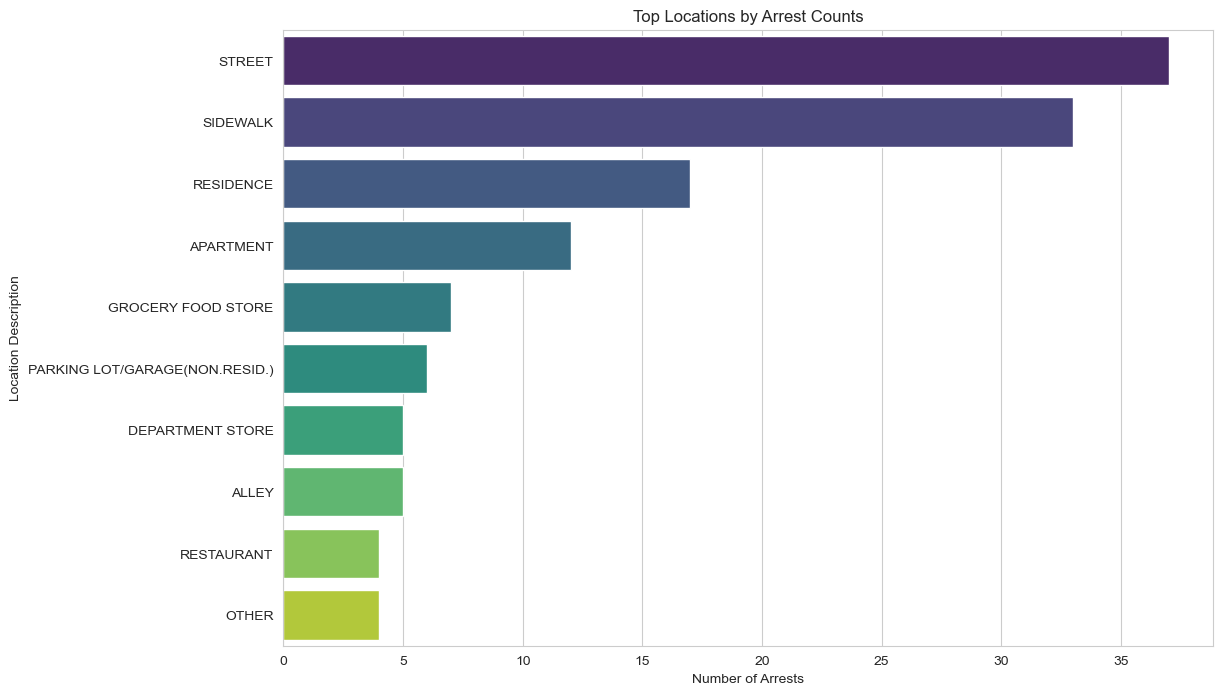

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for the top N locations with the most arrests
plt.figure(figsize=(12, 8))
sns.barplot(x='ARREST_COUNTS', y='LOCATION_DESCRIPTION', data=top_locations, palette='viridis')

plt.title('Top Locations by Arrest Counts')
plt.xlabel('Number of Arrests')
plt.ylabel('Location Description')
plt.show()


In [26]:
contingency_table = pd.crosstab(df['LOCATION_DESCRIPTION'], df['DISTRICT'])

print(contingency_table)

DISTRICT                           1   2   3   4   5   6   7   8   9   10  \
LOCATION_DESCRIPTION                                                        
AIRPORT/AIRCRAFT                    0   0   0   0   0   0   0   1   0   0   
ALLEY                               0   0   0   1   1   1   2   3   0   0   
APARTMENT                           0   5   5   4   2   3   3   3   3   7   
ATHLETIC CLUB                       0   0   0   0   0   0   0   0   0   0   
BANK                                1   0   0   1   0   1   0   0   0   0   
BAR OR TAVERN                       0   0   0   0   0   0   0   0   0   0   
CHA APARTMENT                       0   0   0   1   0   0   0   0   0   0   
CHA HALLWAY/STAIRWELL/ELEVATOR      0   0   0   0   0   0   0   0   0   0   
CHA PARKING LOT/GROUNDS             1   2   0   0   0   0   0   0   0   0   
CHURCH/SYNAGOGUE/PLACE OF WORSHIP   0   0   0   0   0   0   0   0   1   1   
CLEANING STORE                      0   0   0   0   0   0   0   0   0   0   

In [27]:
from scipy.stats import chi2_contingency

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 1244.7556779593485
P-value: 3.800095235462689e-08


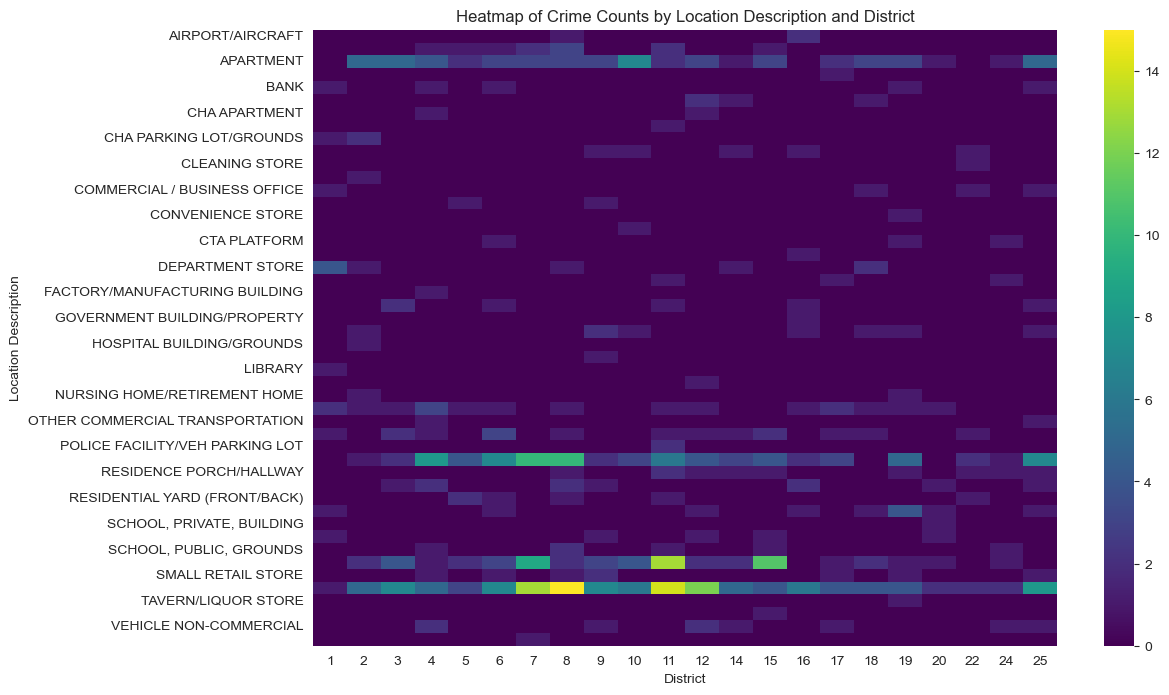

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=False, cmap='viridis')
plt.title('Heatmap of Crime Counts by Location Description and District')
plt.xlabel('District')
plt.ylabel('Location Description')
plt.show()

In [29]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("C:\\Users\\49174\\Downloads\\ChicagoCrimeData.csv")

# Check column names
print(df.columns)


Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [30]:
df['YEAR'] = df['DATE'].dt.year

# Plotting the trend of crimes over years
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df.groupby('YEAR').size().reset_index(name='Counts'), x='YEAR', y='Counts')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Plotting the top 5 crime types
plt.figure(figsize=(10, 6))
sns.countplot(y='PRIMARY_TYPE', data=df, order=df['PRIMARY_TYPE'].value_counts().index[:5])
plt.title('Top 5 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

In [31]:
# Assuming df is your DataFrame
# Ensure the 'DATE' column is converted to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Now, you can safely extract the year (or other datetime components)
df['YEAR'] = df['DATE'].dt.year

In [32]:
print(df['DATE'].dtype)


datetime64[ns]


In [33]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

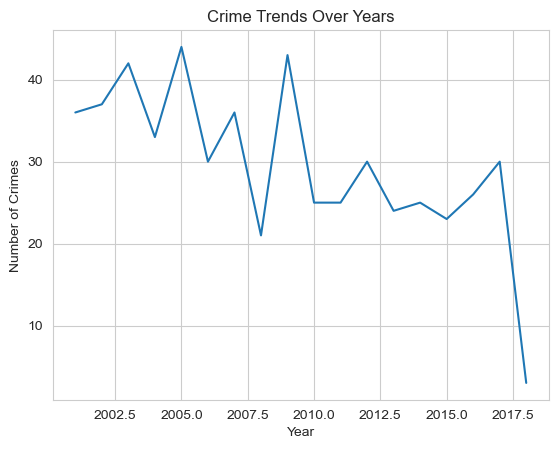

In [34]:
df['YEAR'] = df['DATE'].dt.year

# Plotting the trend of crimes over years
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df.groupby('YEAR').size().reset_index(name='Counts'), x='YEAR', y='Counts')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


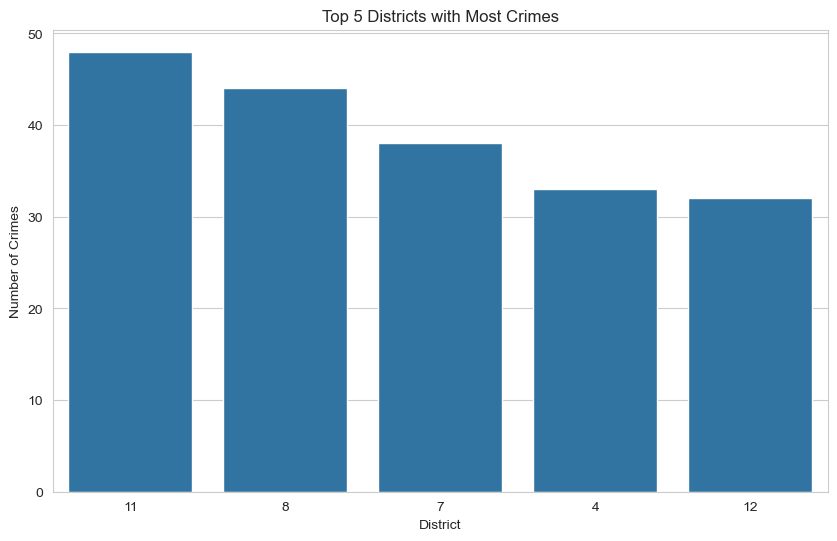

In [35]:
# Assuming 'DISTRICT' is correctly named in your DataFrame
top_districts = df['DISTRICT'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['DISTRICT'].isin(top_districts)], x='DISTRICT', order=top_districts)
plt.title('Top 5 Districts with Most Crimes')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()


In [36]:
!pip install --upgrade pandas seaborn

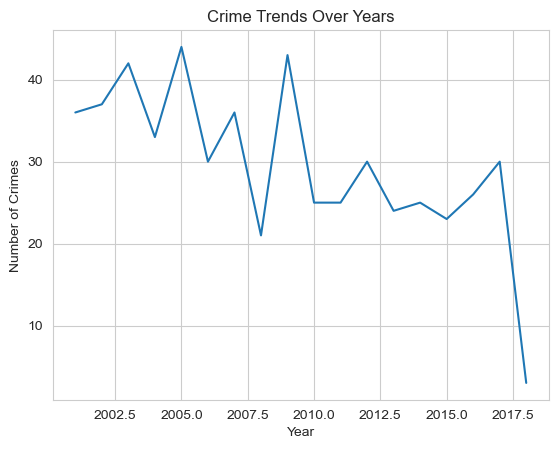

In [37]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


df['YEAR'] = df['DATE'].dt.year

# Plotting the trend of crimes over years
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df.groupby('YEAR').size().reset_index(name='Counts'), x='YEAR', y='Counts')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


In [38]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


ValueError: could not convert string to float: 'HK587712'

In [ ]:
crime_counts = df.groupby(['LOCATION_DESCRIPTION', 'DISTRICT']).size().unstack(fill_value=0)

print(crime_counts)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(crime_counts, cmap='viridis')
plt.title('Crime Counts by Location Description and District')
plt.xlabel('District')
plt.ylabel('Location Description')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crime_counts)
print(f"Chi2 Statistic: {chi2}, P-value: {p}")


In [ ]:
!pip install plotly

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Filter the DataFrame for a specific district to simplify the example
specific_district = df[df['DISTRICT'] == '17']

# Ensure you replace 'YourDistrictCodeHere' with an actual district code from your dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\49174\\Downloads\\ChicagoCrimeData.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information, including the data type of each column
df.info()

# Get a summary of statistics for the numeric columns
print(df.describe())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic style
sns.set(style="whitegrid")

# Plotting histograms for numeric columns
df[['LATITUDE', 'LONGITUDE']].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.show()


In [ ]:
# Plotting the top 10 crime types
plt.figure(figsize=(10, 6))
sns.countplot(y='PRIMARY_TYPE', data=df, order = df['PRIMARY_TYPE'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
plt.show()

# Plotting the top 10 locations for crimes
plt.figure(figsize=(10, 6))
sns.countplot(y='LOCATION_DESCRIPTION', data=df, order = df['LOCATION_DESCRIPTION'].value_counts().index[:10])
plt.title('Top 10 Locations for Crimes')
plt.show()


In [ ]:
# Plotting crimes over the years
plt.figure(figsize=(12, 6))
df.groupby('YEAR').size().plot(kind='line')
plt.title('Number of Crimes Over the Years')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()


In [ ]:
# Plotting the relationship between crime type and arrests
plt.figure(figsize=(12, 6))
sns.countplot(y='PRIMARY_TYPE', hue='ARREST', data=df, order=df['PRIMARY_TYPE'].value_counts().index[:10])
plt.title('Arrests for Top 10 Crime Types')
plt.show()


In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Depending on the analysis, you might decide to drop, fill, or otherwise handle these missing values.
# Example: Filling missing values for 'LATITUDE' and 'LONGITUDE' with the mean value
df['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True)


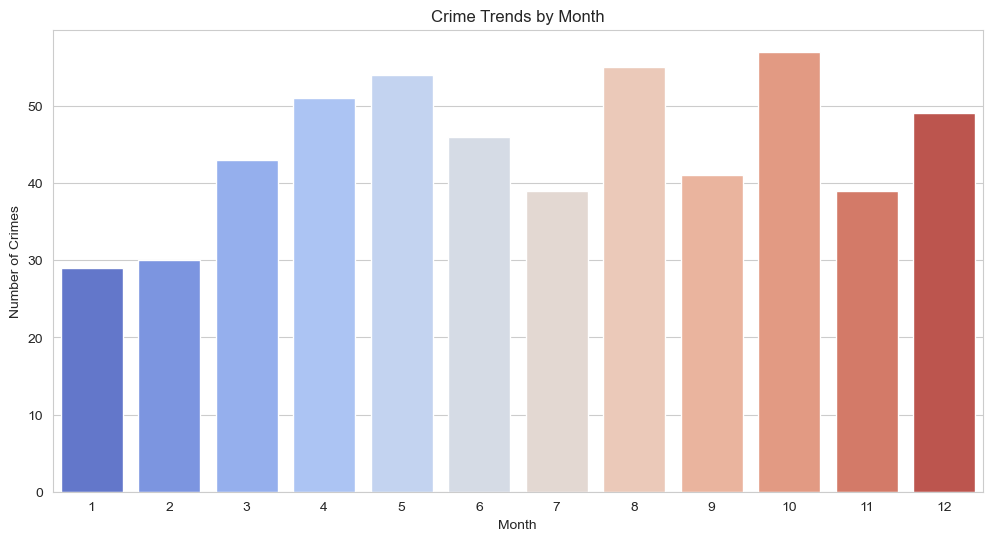

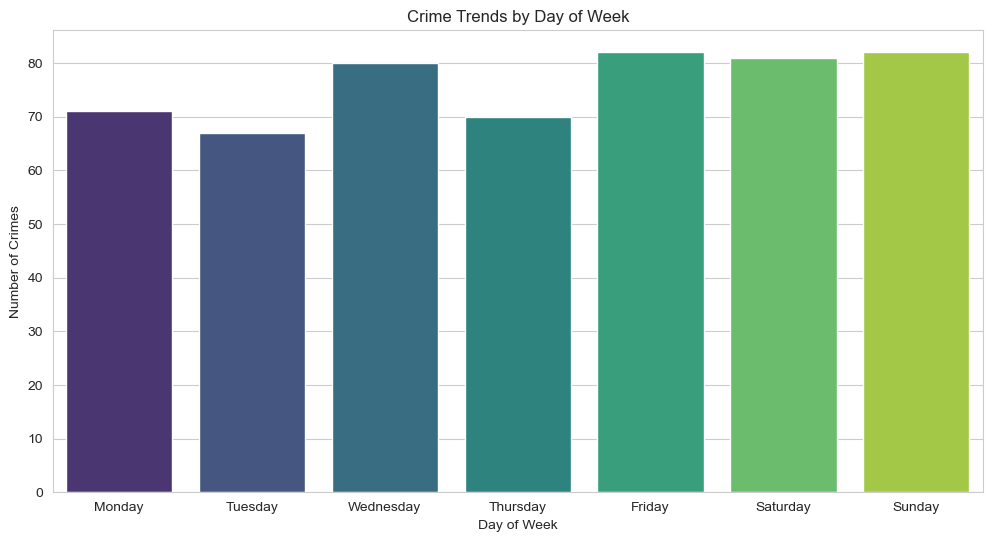

In [39]:
# Extract month and day of week from 'DATE'
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

'''
# Monthly crime trends
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=df, palette='coolwarm')
plt.title('Crime Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()
'''
# Crime trends by day of week
plt.figure(figsize=(12, 6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='DAY_OF_WEEK', data=df, order=order, palette='viridis')
plt.title('Crime Trends by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()


In [40]:
import folium
from folium.plugins import HeatMap

# Generate a base map
m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=11)

# Add a heat map layer
HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(m)

m.save('chicago_crime_heatmap.html')

ValueError: Location values cannot contain NaNs.

In [ ]:
# Calculate arrest rates by crime type
arrest_rates = df.groupby('PRIMARY_TYPE')['ARREST'].mean().sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(12, 8))
arrest_rates.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Arrest Rates by Crime Type')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Crime Type')
plt.show()


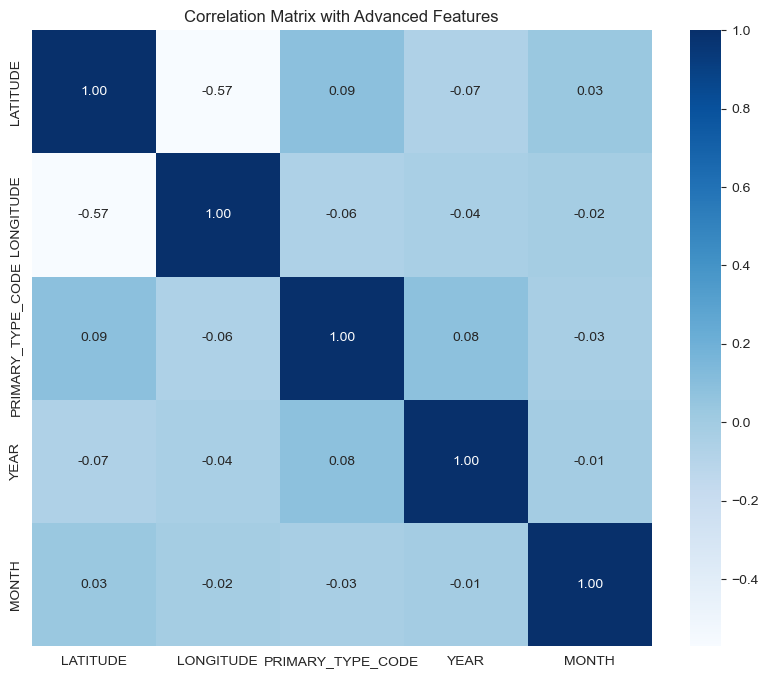

In [41]:
# Example: Convert 'PRIMARY_TYPE' into numeric codes for correlation analysis
df['PRIMARY_TYPE_CODE'] = df['PRIMARY_TYPE'].astype('category').cat.codes

# Select numeric columns for correlation
numeric_cols = ['LATITUDE', 'LONGITUDE', 'PRIMARY_TYPE_CODE', 'YEAR', 'MONTH']
corr_matrix = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix with Advanced Features')
plt.show()

In [42]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [43]:
# Now that 'DATE' is confirmed to be in datetime format, extract month and day of the week
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()


In [44]:
# Check the first few rows to confirm 'DATE' is in datetime format
print(df['DATE'].head())


0   2004-08-28
1   2004-06-26
2   2011-04-04
3   2010-12-30
4   2016-02-02
Name: DATE, dtype: datetime64[ns]


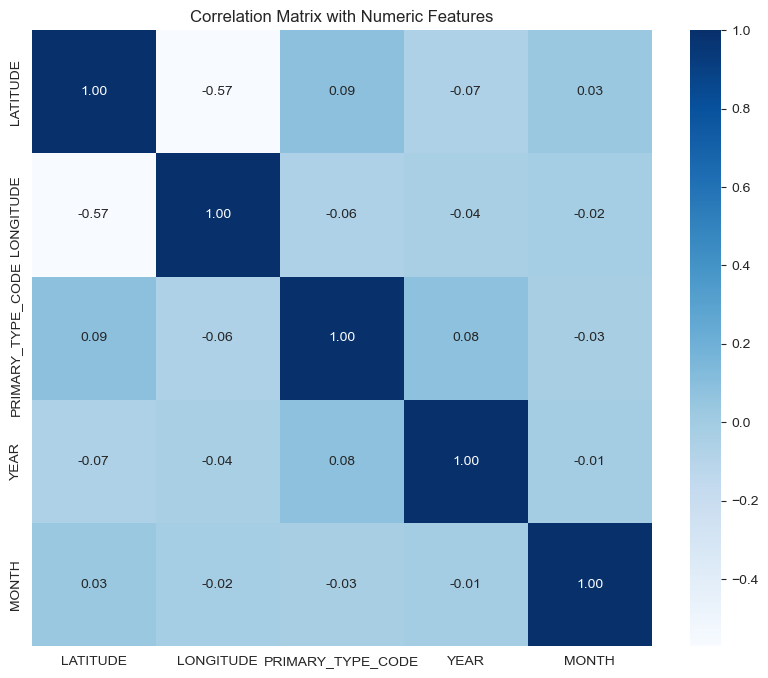

In [45]:
# Assuming 'PRIMARY_TYPE_CODE' was correctly generated
numeric_cols = ['LATITUDE', 'LONGITUDE', 'PRIMARY_TYPE_CODE', 'YEAR', 'MONTH']
corr_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix with Numeric Features')
plt.show()